Import Dataset

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns

In [10]:
df=pd.read_csv("/content/drive/MyDrive/machine learning/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Next step is to understand the dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [12]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [13]:
df.shape

(918, 12)

In [14]:
df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
430,57,M,ASY,128,0,1,ST,148,Y,1.0,Flat,1
718,57,M,ASY,165,289,1,LVH,124,N,1.0,Flat,1
381,50,M,ASY,115,0,0,Normal,120,Y,0.5,Flat,1
235,39,M,ATA,120,200,0,Normal,160,Y,1.0,Flat,0
197,42,M,ATA,150,268,0,Normal,136,N,0.0,Up,0


In [15]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [16]:
df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

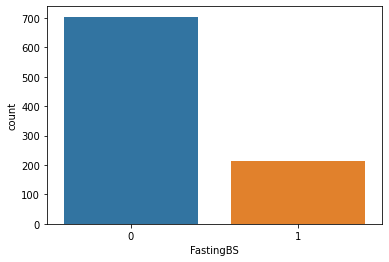

In [17]:
sns.countplot(x="FastingBS",data=df)

In [18]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [19]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

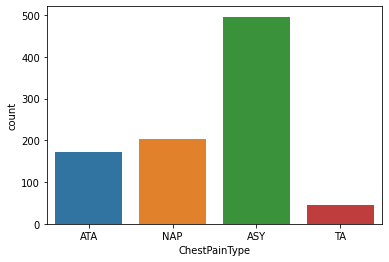

In [20]:
sns.countplot(x='ChestPainType',data=df)

In [21]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

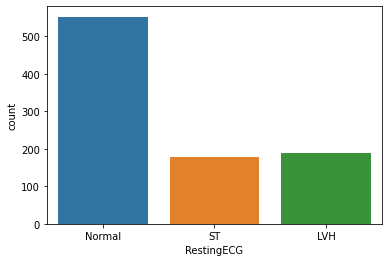

In [22]:
sns.countplot(x='RestingECG',data=df)

There are no null values present in this dataset. Lets check if there are any miscategeorized values.

Lets encode the required data

In [23]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [24]:
df1=df
categorical_columns = ['Sex', 'ChestPainType', 
       'RestingECG',  'ExerciseAngina', 'ST_Slope',
      ]

for column in categorical_columns:
    cat = pd.get_dummies(df[column], prefix=column)

    df1 = pd.merge(
        left=df1,
        right=cat,
        left_index=True,
        right_index=True,
    )

    df1 = df1.drop(columns=column)



In [25]:
df1

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0


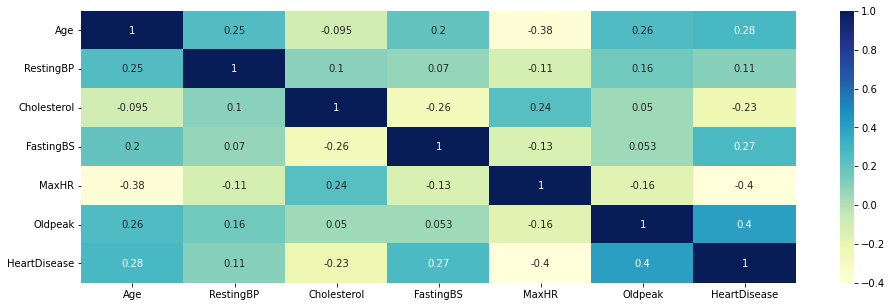

In [26]:

import matplotlib.pyplot as plt
plt.figure(figsize = (16,5))
l=df.corr()
sns.heatmap(l,cmap="YlGnBu", annot=True)

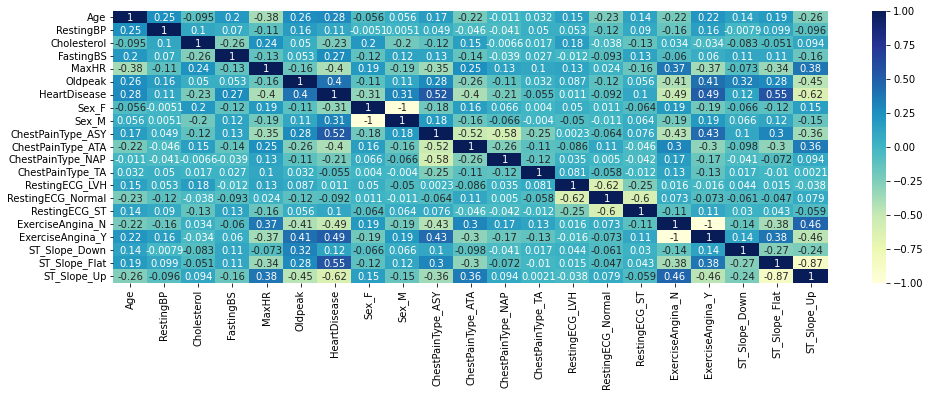

In [27]:

plt.figure(figsize = (16,5))
l=df1.corr()
sns.heatmap(l,cmap="YlGnBu", annot=True)

**Here we have the important observation the correlation of all independent variables with respect to heart disease is better shown after encoding than before**

**We can say that every independent variable has some effect on dependent variable**

Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
y=df1['HeartDisease']
df2=df1.drop('HeartDisease',axis=1)
col=df2.columns
df2=scaler.fit_transform(df2)
df2

array([[-1.4331398 ,  0.41090889,  0.82507026, ..., -0.27144836,
        -1.00218103,  1.15067399],
       [-0.47848359,  1.49175234, -0.17196105, ..., -0.27144836,
         0.99782372, -0.86905588],
       [-1.75135854, -0.12951283,  0.7701878 , ..., -0.27144836,
        -1.00218103,  1.15067399],
       ...,
       [ 0.37009972, -0.12951283, -0.62016778, ..., -0.27144836,
         0.99782372, -0.86905588],
       [ 0.37009972, -0.12951283,  0.34027522, ..., -0.27144836,
         0.99782372, -0.86905588],
       [-1.64528563,  0.30282455, -0.21769643, ..., -0.27144836,
        -1.00218103,  1.15067399]])

In [29]:
df2=pd.DataFrame(df2,columns=col)
df2

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,-0.515952,0.515952,-1.084138,2.075177,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,-1.002181,1.150674
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,1.938163,-1.938163,-1.084138,-0.481887,1.876744,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,-0.515952,0.515952,-1.084138,2.075177,-0.532838,-0.229679,-0.507478,-1.228087,2.038947,0.823556,-0.823556,-0.271448,-1.002181,1.150674
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,1.938163,-1.938163,0.922392,-0.481887,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,-1.214246,1.214246,-0.271448,0.997824,-0.869056
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,-0.515952,0.515952,-1.084138,-0.481887,1.876744,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,-1.002181,1.150674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,-0.551341,-0.188999,0.293283,-0.515952,0.515952,-1.084138,-0.481887,-0.532838,4.353909,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056
914,1.536902,0.627078,-0.053049,1.813758,0.164684,2.357094,-0.515952,0.515952,0.922392,-0.481887,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056
915,0.370100,-0.129513,-0.620168,-0.551341,-0.857069,0.293283,-0.515952,0.515952,0.922392,-0.481887,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,-1.214246,1.214246,-0.271448,0.997824,-0.869056
916,0.370100,-0.129513,0.340275,-0.551341,1.461525,-0.832432,1.938163,-1.938163,-1.084138,2.075177,-0.532838,-0.229679,1.970528,-1.228087,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056


**Prediction part**

Our problem is of type classification .So we will first get training and testing data and will work with various models.

In [30]:
from sklearn.model_selection import train_test_split
X=df2

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [31]:
x_train.sample(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
908,1.006537,0.410909,-0.107932,-0.551341,0.282579,2.919951,-0.515952,0.515952,0.922392,-0.481887,-0.532838,-0.229679,1.970528,-1.228087,-0.490449,-1.214246,1.214246,-0.271448,-1.002181,1.150674
92,-0.160265,-0.669935,0.102451,-0.551341,0.439772,-0.832432,1.938163,-1.938163,-1.084138,2.075177,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,-1.002181,1.150674
55,-0.266338,1.491752,-0.043902,-0.551341,1.304332,-0.832432,1.938163,-1.938163,-1.084138,2.075177,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,-1.002181,1.150674
838,1.006537,-0.129513,1.200100,1.813758,-0.188999,0.856140,-0.515952,0.515952,0.922392,-0.481887,-0.532838,-0.229679,1.970528,-1.228087,-0.490449,-1.214246,1.214246,-0.271448,-1.002181,1.150674
647,-1.751359,-0.669935,0.148187,-0.551341,1.304332,-0.832432,1.938163,-1.938163,-1.084138,-0.481887,1.876744,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,-1.002181,1.150674


In [32]:
y_test.head()

300    1
862    0
562    0
634    0
455    0
Name: HeartDisease, dtype: int64

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,roc_auc_score,classification_report,confusion_matrix
def metric(y_test,y_pred):
    h={}
    h['metrics']=classification_report(y_test,y_pred)
    h['accuracy']=accuracy_score(y_test,y_pred)
    h['confusion_matrix']=confusion_matrix(y_test,y_pred)
    return h

**1st model decisiion tree**

In [34]:
from sklearn.tree import DecisionTreeClassifier 
model1=DecisionTreeClassifier()
model1.fit(x_train,y_train)
y1_pred=model1.predict(x_test)

In [35]:
l=metric(y_test,y1_pred)
for i in l:
    print(l[i])

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       121
           1       0.74      0.78      0.76       109

    accuracy                           0.77       230
   macro avg       0.77      0.77      0.77       230
weighted avg       0.77      0.77      0.77       230

0.7652173913043478
[[91 30]
 [24 85]]


**knn**

In [36]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()
model2.fit(x_train,y_train)
y2_pred=model2.predict(x_test)

In [37]:
l=metric(y_test,y2_pred)
for i in l:
    print(l[i])

              precision    recall  f1-score   support

           0       0.89      0.77      0.83       121
           1       0.78      0.90      0.83       109

    accuracy                           0.83       230
   macro avg       0.84      0.83      0.83       230
weighted avg       0.84      0.83      0.83       230

0.8304347826086956
[[93 28]
 [11 98]]


**lOGISTIC**

In [38]:
from sklearn.linear_model import LogisticRegression
model3=LogisticRegression()
model3.fit(x_train,y_train)
y3_pred=model3.predict(x_test)

In [39]:
l=metric(y_test,y3_pred)
for i in l:
    print(l[i])

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       121
           1       0.78      0.89      0.83       109

    accuracy                           0.83       230
   macro avg       0.83      0.83      0.83       230
weighted avg       0.84      0.83      0.83       230

0.8304347826086956
[[94 27]
 [12 97]]


**Random Forest**

In [40]:
from sklearn.ensemble import RandomForestClassifier
model4=RandomForestClassifier()
model4.fit(x_train,y_train)
y4_pred=model4.predict(x_test)

In [41]:
l=metric(y_test,y4_pred)
for i in l:
    print(l[i])

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       121
           1       0.80      0.91      0.85       109

    accuracy                           0.85       230
   macro avg       0.86      0.85      0.85       230
weighted avg       0.86      0.85      0.85       230

0.8521739130434782
[[97 24]
 [10 99]]


**Based on verification of all the models the data is best fit for knn,logistic with a good accuracy around 86%**